In [13]:
# Dataset available at https://archive.ics.uci.edu/dataset/236/seeds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("./seeds_dataset.txt", delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [10]:
X = df.drop(7, axis=1).values
y = df[7].values

print(X.shape)
print(y.shape)

(210, 7)
(210,)


In [11]:
from sklearn import preprocessing
X_norm = preprocessing.scale(X)
print(X_norm.shape)

(210, 7)


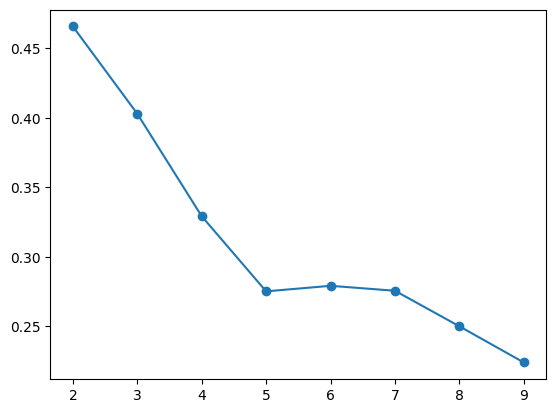

In [16]:
%matplotlib inline
from sklearn import cluster, metrics

silhouettes = []
for num_clusters in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters,n_init=1, init='random')
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2, 10), silhouettes, marker='o')


In [18]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)

print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.71874303 0.88982486]


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


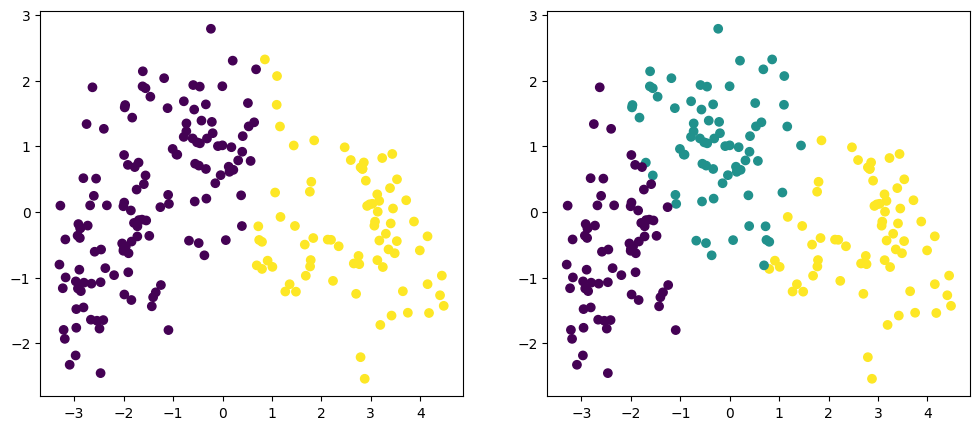

In [20]:
fig = plt.figure(figsize=(12, 5))

cls = cluster.KMeans(n_clusters=2)
cls.fit(X_norm)
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls.labels_)

cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_norm)
ax = fig.add_subplot(122)
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls3.labels_)


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


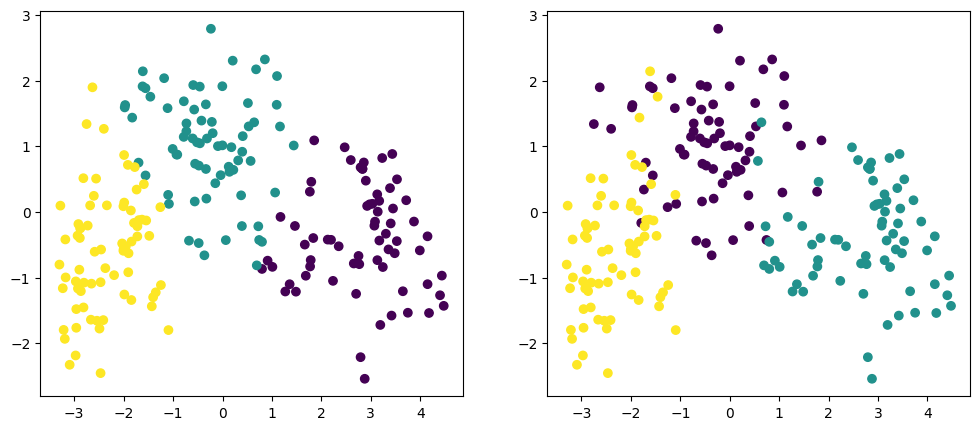

In [24]:
fig = plt.figure(figsize=(12, 5))

cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_norm)
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls3.labels_)

ax = fig.add_subplot(122)
ax.scatter(X_trans[:,0], X_trans[:,1], c=y)


In [26]:
print(metrics.adjusted_rand_score(y, cls3.labels_))

0.7732937360806309
